In [100]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [101]:
q1_path = "data/mr-art_q1_incomplete/fsqc-results.csv"
q2_path = "data/mr-art_q2_incomplete/fsqc-results.csv"
q3_path = "data/mr-art_q3_incomplete/fsqc-results.csv"

In [102]:
q1_df = pd.read_csv(q1_path)
q2_df = pd.read_csv(q2_path)
q3_df = pd.read_csv(q3_path)

q1_df["QA"] = np.array([1 for _ in range(q1_df.shape[0])])
q2_df["QA"] = np.array([0 for _ in range(q2_df.shape[0])])
q3_df["QA"] = np.array([-1 for _ in range(q3_df.shape[0])])

# q1_df["QA"] = np.repeat([1], (q1_df.shape[0]))
# q2_df["QA"] = np.repeat([0], (q2_df.shape[0]))
# q3_df["QA"] = np.repeat([-1], (q3_df.shape[0]))

In [103]:
df = pd.concat([q1_df, q2_df, q3_df])
# df["QA"] = df["QA"].astype("category").cat.codes
df.describe()


,wm_snr_orig,gm_snr_orig,wm_snr_norm,gm_snr_norm,cc_size,holes_lh,holes_rh,defects_lh,defects_rh,topo_lh,topo_rh,con_snr_lh,con_snr_rh,rot_tal_x,rot_tal_y,rot_tal_z,QA
count,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000
mean,10.853294,5.961713,17.668110,6.143584,0.003275,25.958175,22.091255,24.726236,24.627376,3.330798,6.984030,3.572310,3.515441,-0.152223,-0.007125,0.037828,-0.030418
std,2.244398,1.221902,4.163627,0.288557,0.000683,32.420810,30.173152,22.290097,22.923494,6.974736,20.946072,0.377655,0.351998,0.104838,0.042039,0.042781,0.868790
min,4.626449,2.396850,6.354578,5.374248,0.001880,1.000000,1.000000,1.000000,2.000000,0.300000,0.500000,1.654799,1.568215,-0.499015,-0.100883,-0.079715,-1.000000
25%,9.242957,5.169347,14.814062,5.928668,0.002728,8.000000,6.000000,10.000000,9.000000,0.800000,1.300000,3.429714,3.376414,-0.209416,-0.040002,0.009827,-1.000000
50%,10.939395,6.193530,18.623680,6.109107,0.003257,14.000000,10.000000,17.000000,15.000000,1.400000,2.000000,3.660758,3.609516,-0.146112,-0.006730,0.038019,0.000000
75%,12.563555,6.929798,21.002324,6.338225,0.003713,29.500000,24.000000,30.000000,30.000000,2.600000,3.950000,3.820237,3.728820,-0.083604,0.021692,0.069276,1.000000
max,16.288435,8.026777,25.953728,7.197556,0.005519,242.000000,192.000000,135.000000,124.000000,80.400000,170.200000,4.158955,4.031086,0.095712,0.104968,0.149947,1.000000


In [104]:
df["QA"].unique()

array([ 1,  0, -1])

In [105]:
df.head()

,subject,wm_snr_orig,gm_snr_orig,wm_snr_norm,gm_snr_norm,cc_size,holes_lh,holes_rh,defects_lh,defects_rh,topo_lh,topo_rh,con_snr_lh,con_snr_rh,rot_tal_x,rot_tal_y,rot_tal_z,QA
0,sub-000103_ffs,10.000654,6.019692,19.432695,6.109107,0.003046,11,6,12,14,1.4,3.0,3.660614,3.634103,-0.125505,-0.039750,0.057555,1
1,sub-000148_ffs,14.769779,7.689649,20.325463,6.132823,0.004618,9,9,11,13,0.8,2.0,3.851002,3.755431,-0.094672,-0.054969,-0.019179,1
2,sub-000149_ffs,12.324185,6.921628,23.187858,6.459551,0.004436,5,4,11,9,1.3,1.9,3.835994,3.668603,-0.419358,-0.011683,0.031877,1
3,sub-000159_ffs,11.519914,6.663154,19.410462,6.548151,0.003895,5,6,12,8,1.5,1.6,3.786864,3.625860,-0.189891,-0.030725,-0.014502,1
4,sub-000175_ffs,10.050163,5.915631,21.516876,6.190888,0.002560,9,4,10,14,0.7,1.3,3.956455,3.828863,-0.252640,-0.013951,0.102339,1


## Feature description

variable       |   description
---------------|----------------------------------------------------------------
subject        |   subject ID
wm_snr_orig    |   signal-to-noise ratio for white matter in orig.mgz
gm_snr_orig    |   signal-to-noise ratio for gray matter in orig.mgz
wm_snr_norm    |   signal-to-noise ratio for white matter in norm.mgz
gm_snr_norm    |   signal-to-noise ratio for gray matter in norm.mgz
cc_size        |   relative size of the corpus callosum
lh_holes       |   number of holes in the left hemisphere
rh_holes       |   number of holes in the right hemisphere
lh_defects     |   number of defects in the left hemisphere
rh_defects     |   number of defects in the right hemisphere
topo_lh        |   topological fixing time for the left hemisphere
topo_rh        |   topological fixing time for the right hemisphere
con_lh_snr     |   wm/gm contrast signal-to-noise ratio in the left hemisphere
con_rh_snr     |   wm/gm contrast signal-to-noise ratio in the right hemisphere
rot_tal_x      |   rotation component of the Talairach transform around the x axis
rot_tal_y      |   rotation component of the Talairach transform around the y axis
rot_tal_z      |   rotation component of the Talairach transform around the z axis

## Correlation matrix

/var/folders/87/9hb0405109566_ndd0hyxsp00000gn/T/ipykernel_71309/610497665.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  c = df.corr()


<Axes: >

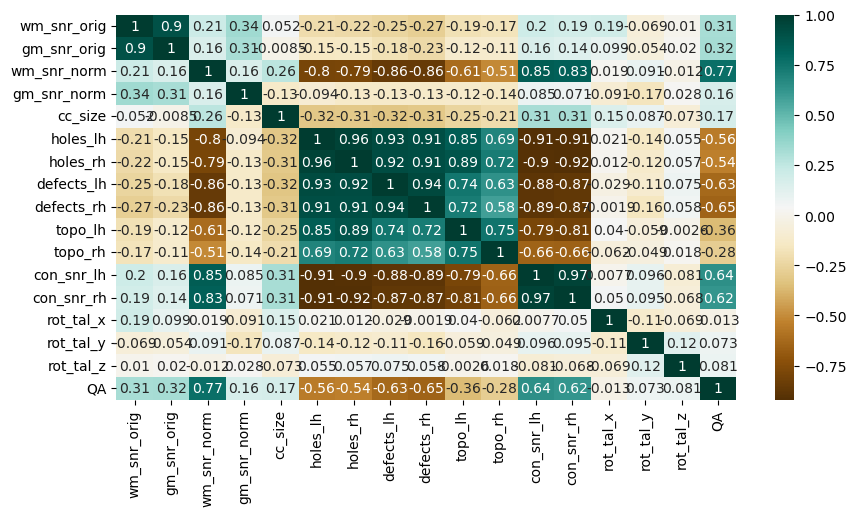

In [106]:
plt.figure(figsize=(10, 5))
c = df.corr()
sns.heatmap(c, cmap="BrBG", annot=True)
# c

In [107]:
from sklearn.decomposition import PCA

X, y = df.drop(["subject", "QA"], axis=1), df["QA"]
pca = PCA(n_components=7)
XPCAreduced = pca.fit_transform(X)

0 0 defects
0 1 con_snr
1 0 wm_snr_norm


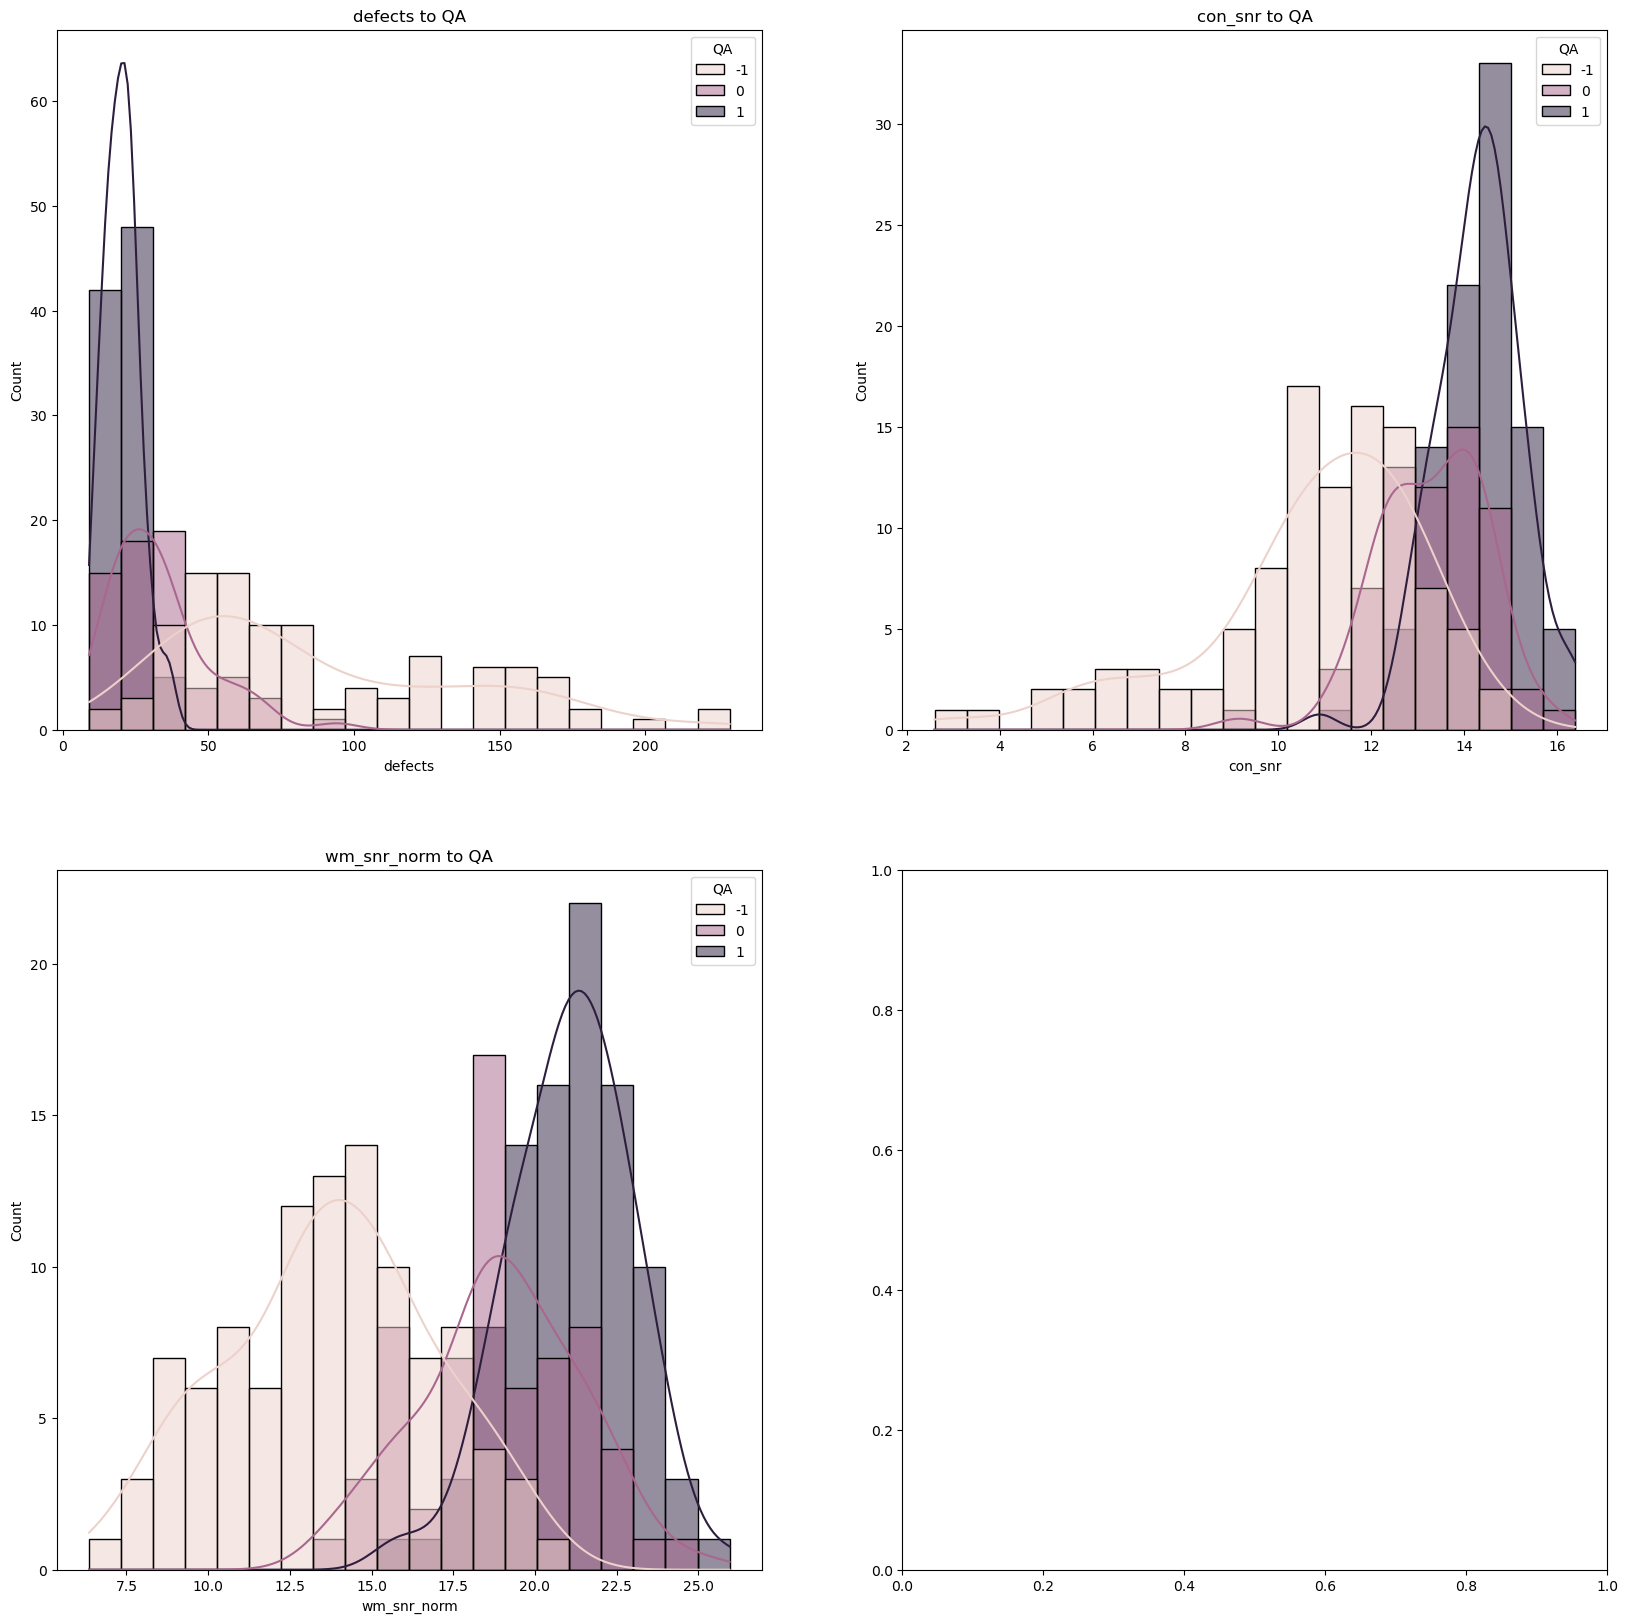

In [108]:
import itertools

from ml.utils import load_cleaned_dataset

features = ["defects", "con_snr", "wm_snr_norm"]

X, y = load_cleaned_dataset()


fig, axs = plt.subplots(2, 2)
fig.set_size_inches(20, 20)

for (i1, i2), feature in zip(itertools.product([0, 1], [0, 1]), features):
    print(i1, i2, feature)
    # axs[i1, i2].scatter(df[feature], df[target])
    axs[i1, i2].set_title(f"{feature} to QA")

    sns.histplot(x=X[feature], bins=20, kde=True, ax=axs[i1, i2], hue=y)

0 0 wm_snr_orig
0 1 gm_snr_orig
0 2 wm_snr_norm
0 3 gm_snr_norm
1 0 cc_size
1 1 holes_lh
1 2 holes_rh
1 3 defects_lh
2 0 defects_rh
2 1 topo_lh
2 2 topo_rh
2 3 con_snr_lh
3 0 con_snr_rh
3 1 rot_tal_x
3 2 rot_tal_y
3 3 rot_tal_z


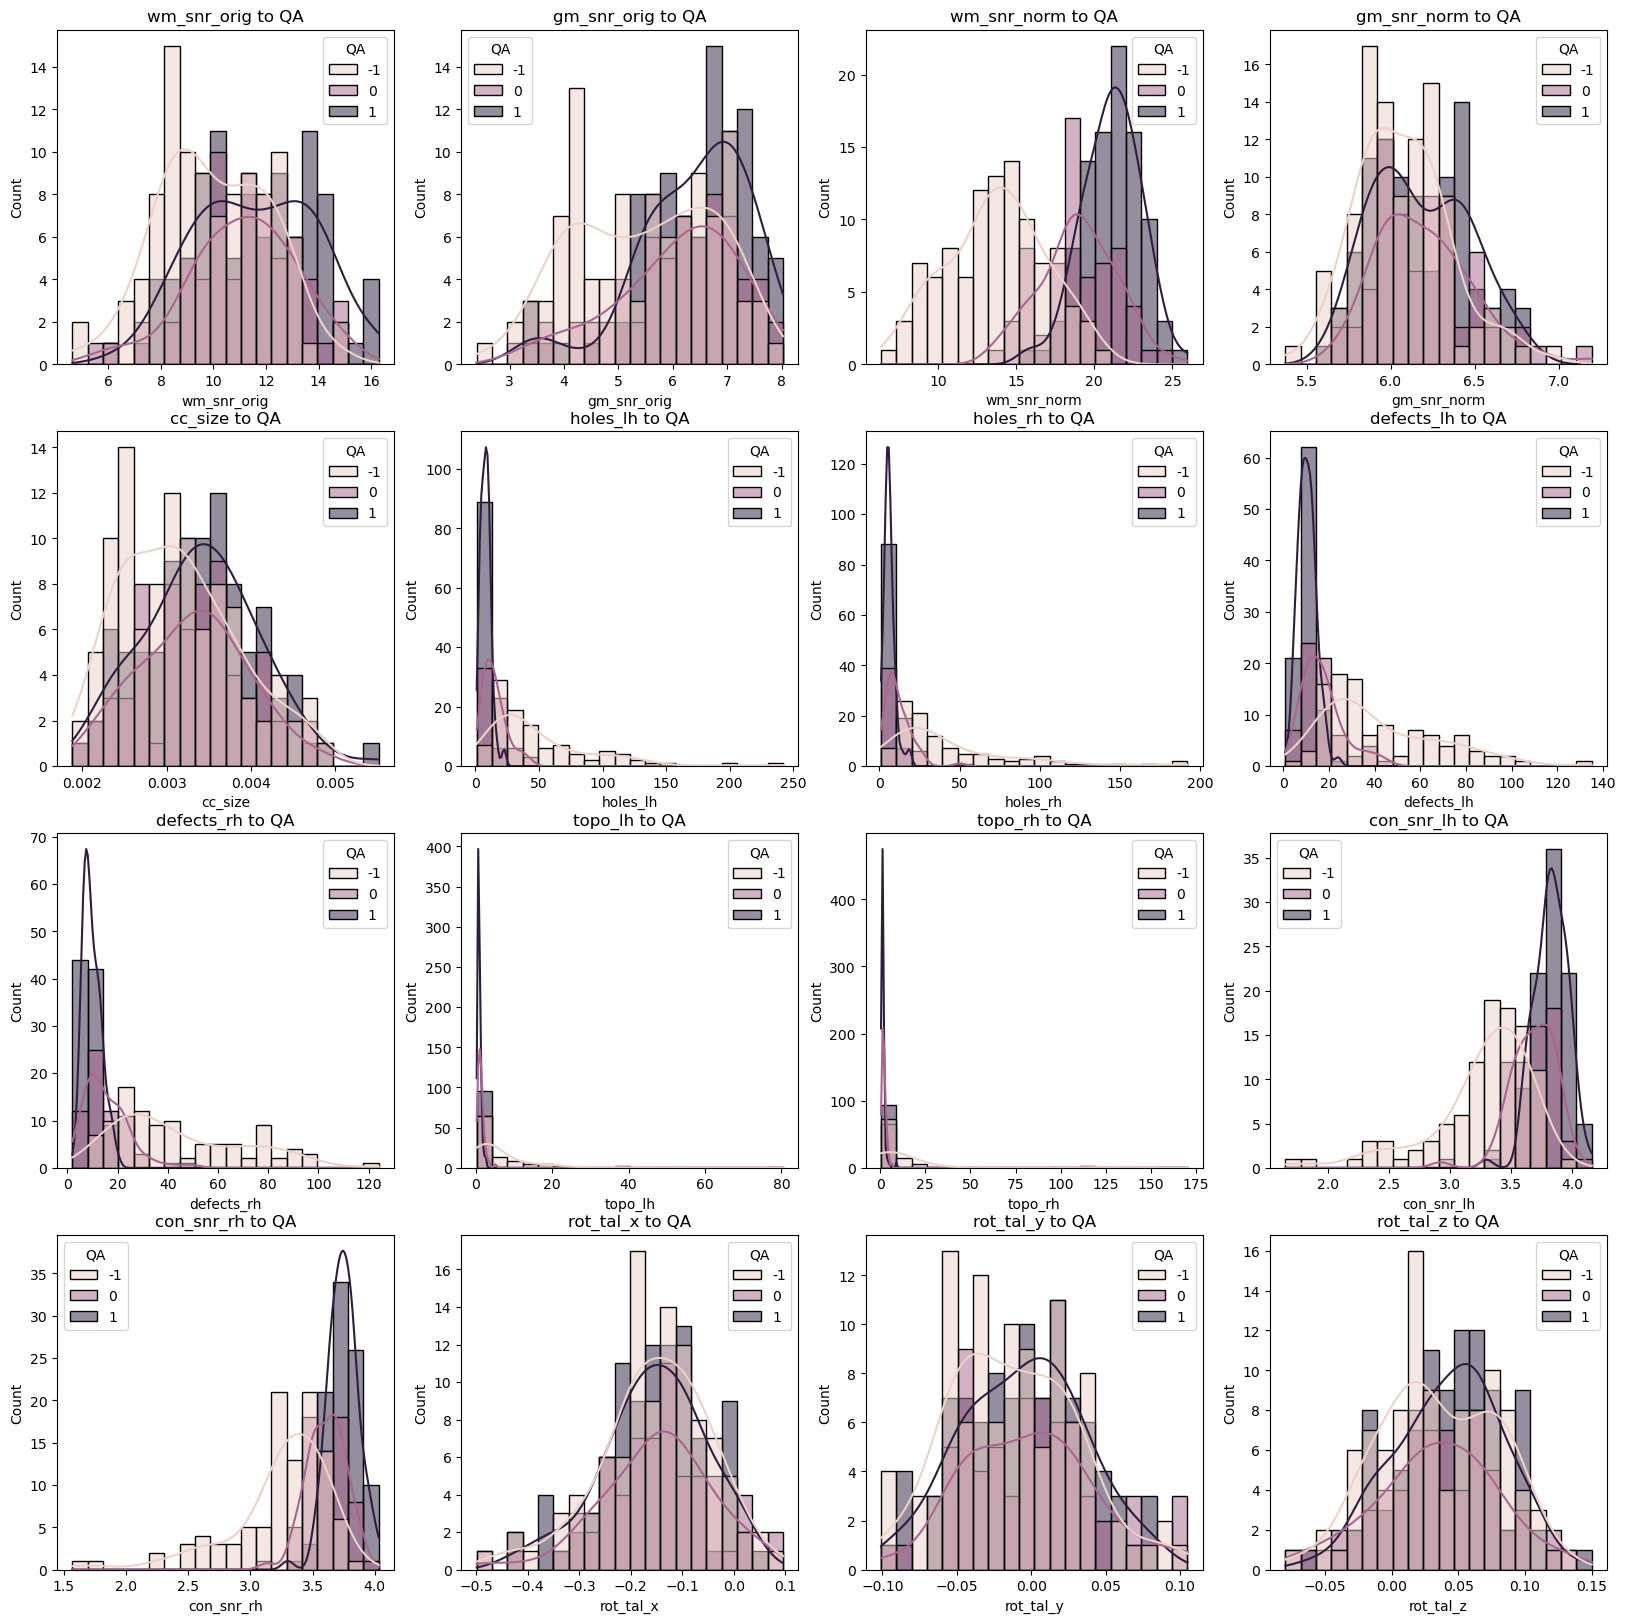

In [109]:
import itertools

features = [
    "wm_snr_orig",
    "gm_snr_orig",
    "wm_snr_norm",
    "gm_snr_norm",
    "cc_size",
    "holes_lh",
    "holes_rh",
    "defects_lh",
    "defects_rh",
    "topo_lh",
    "topo_rh",
    "con_snr_lh",
    "con_snr_rh",
    "rot_tal_x",
    "rot_tal_y",
    "rot_tal_z",
]

target = "QA"

fig, axs = plt.subplots(4, 4)
fig.set_size_inches(20, 20)

for (i1, i2), feature in zip(itertools.product([0, 1, 2, 3], [0, 1, 2, 3]), features):
    print(i1, i2, feature)
    # axs[i1, i2].scatter(df[feature], df[target])
    axs[i1, i2].set_title(f"{feature} to QA")

    sns.histplot(
        x=df[feature], bins=20, kde=True, ax=axs[i1, i2], hue=df[target]
    )

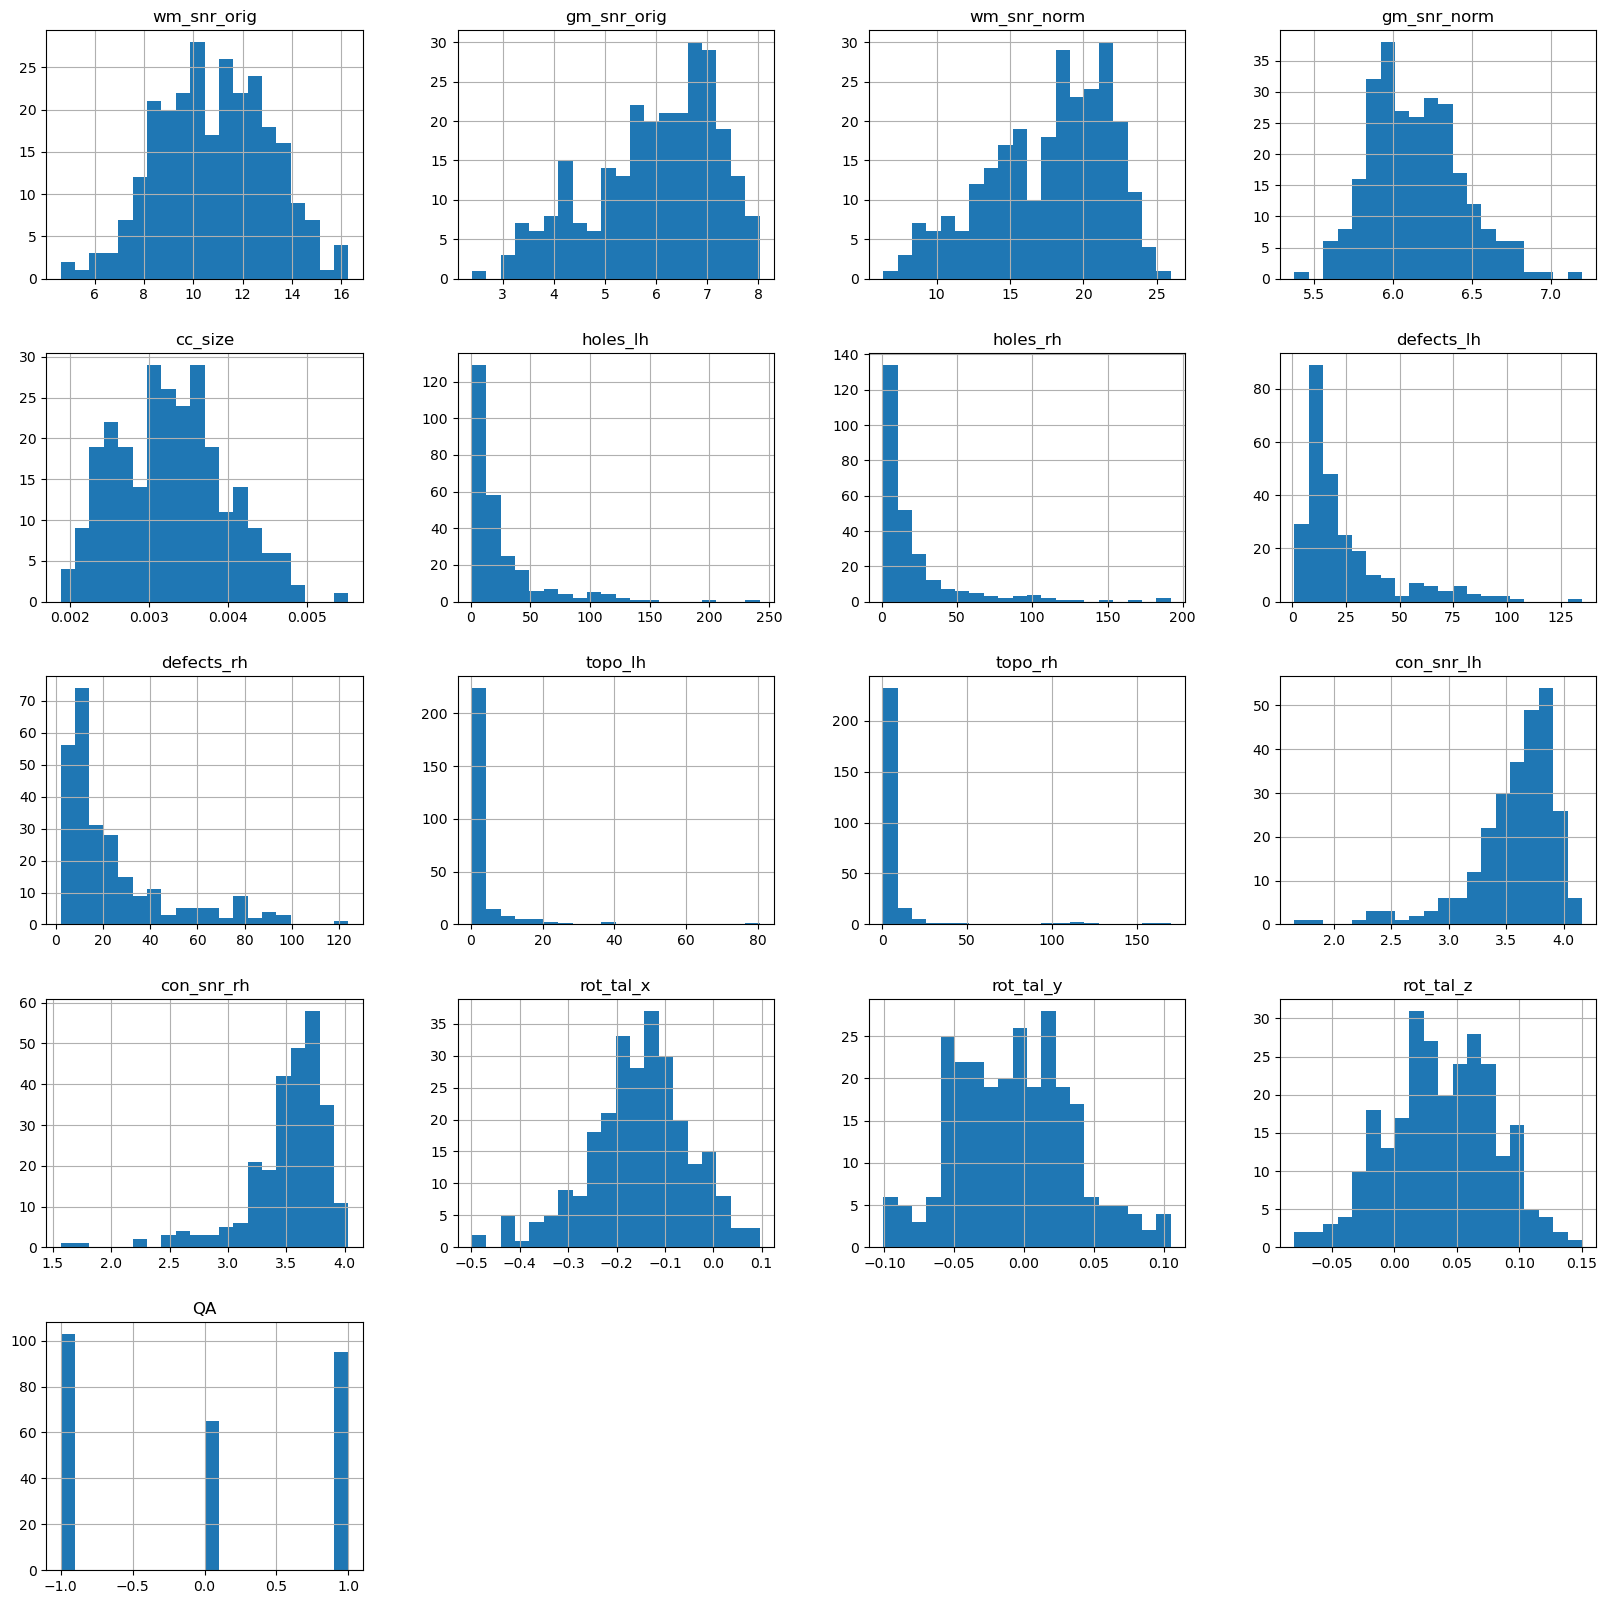

In [110]:
df.hist(bins=20, figsize=(20, 20))
plt.show()

In [111]:
df = df.drop(["wm_snr_orig", "gm_snr_orig", "cc_size", "topo_lh", "topo_rh", "rot_tal_x", "rot_tal_y", "rot_tal_z"], axis=1)

/var/folders/87/9hb0405109566_ndd0hyxsp00000gn/T/ipykernel_71309/610497665.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  c = df.corr()


<Axes: >

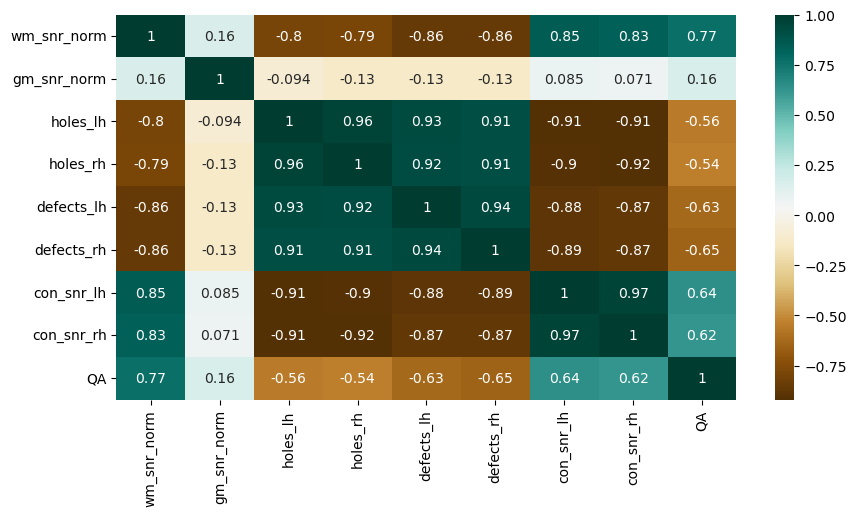

In [112]:
plt.figure(figsize=(10, 5))
c = df.corr()
sns.heatmap(c, cmap="BrBG", annot=True)
# c

## Additional data cleaning

In [113]:
df["Defects"] = df["defects_lh"] + df["defects_rh"]
df["CON_SNR"] = df["con_snr_lh"] * df["con_snr_rh"]

df = df.drop(
    ["gm_snr_norm", "holes_lh", "holes_rh", "con_snr_lh", "con_snr_rh"], axis=1
)

df = df[["subject", "Defects", "CON_SNR", "wm_snr_norm", "QA"]]

/var/folders/87/9hb0405109566_ndd0hyxsp00000gn/T/ipykernel_71309/610497665.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  c = df.corr()


<Axes: >

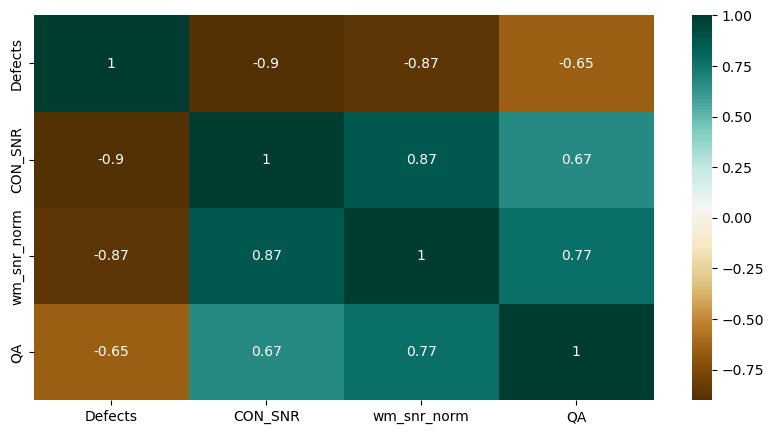

In [114]:
plt.figure(figsize=(10, 5))
c = df.corr()
sns.heatmap(c, cmap="BrBG", annot=True)
# c

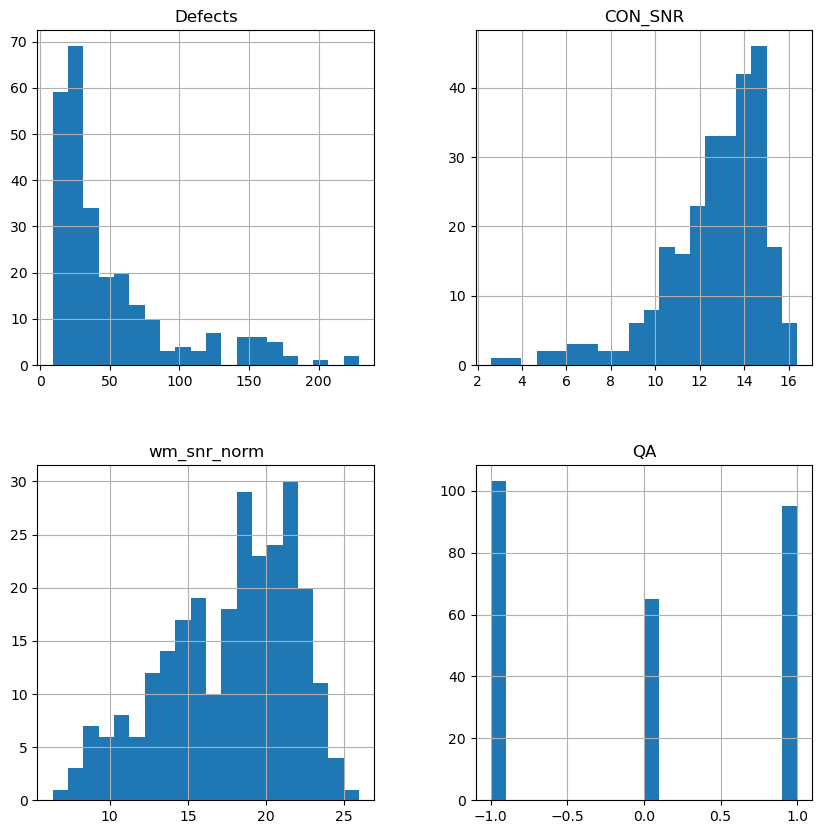

In [115]:
df.hist(bins=20, figsize=(10, 10))
plt.show()

In [116]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from ml.utils import load_dataset

# X, y = df.drop(["subject", "QA"], axis=1), df["QA"]

X, y = load_dataset()

X = StandardScaler().fit_transform(X, y)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [117]:
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier

# Don't have to set `multi_class` argument if used with OVOClassifier
ovo = OneVsOneClassifier(estimator=GaussianProcessClassifier())

ovo.fit(X_train, y_train)

OneVsOneClassifier(estimator=GaussianProcessClassifier())

In [120]:
from sklearn.metrics import accuracy_score

from ml.utils import load_dataset

y_pred = ovo.predict(X_test)
score = accuracy_score(y_pred=y_pred, y_true=y_test)
score

# Convert into ONNX format.
from skl2onnx import to_onnx

data, target = load_dataset()
train_x, valid_x, train_y, valid_y = train_test_split(
    data, target, test_size=0.2, stratify=target
)


onx = to_onnx(ovo, data[:1].to_numpy())
with open("rf_iris.onnx", "wb") as f:
    f.write(onx.SerializeToString())



[('X', DoubleTensorType(shape=[None, 16]))]


In [121]:
# Compute the prediction with onnxruntime.
import onnxruntime as rt

sess = rt.InferenceSession("rf_iris.onnx")
input_name = sess.get_inputs()[0].name
label_name = sess.get_outputs()[0].name
pred_onx = sess.run([label_name], {input_name: valid_x.astype(np.float32)})[0]

Fail: [ONNXRuntimeError] : 1 : FAIL : Load model from rf_iris.onnx failed:Fatal error: com.microsoft:Solve(-1) is not a registered function/op

<Axes: >

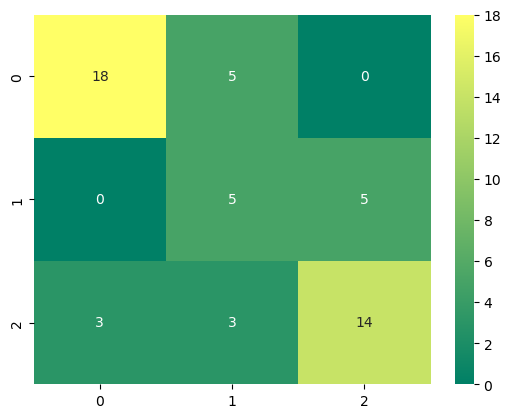

In [ ]:
from sklearn.metrics import confusion_matrix  # for confusion matrix

sns.heatmap(confusion_matrix(y_pred, y_test), annot=True, cmap="summer")

The overall score for Decision Tree classifier is: 65.37
[('X', FloatTensorType(shape=[None, 16]))]


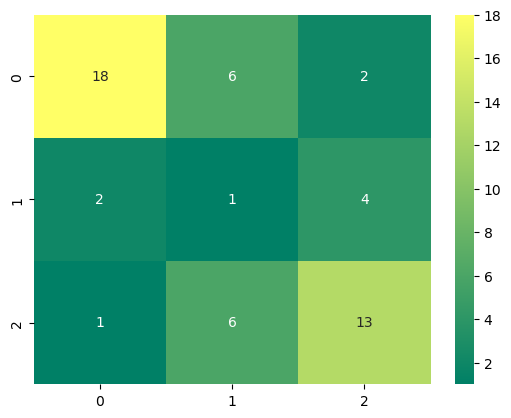

In [127]:
from sklearn.model_selection import KFold, cross_val_predict, cross_val_score
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(
    criterion="gini", min_samples_split=10, min_samples_leaf=1, max_depth=20
)
model.fit(X_train, y_train)
dt_pred = model.predict(X_test)
kfold = KFold(n_splits=10)  # k=10, split the data into 10 equal parts
result_tree = cross_val_score(model, X, y, cv=10, scoring="accuracy")
print(
    "The overall score for Decision Tree classifier is:",
    round(result_tree.mean() * 100, 2),
)
y_pred = cross_val_predict(model, X, y, cv=10)
sns.heatmap(confusion_matrix(dt_pred, y_test), annot=True, cmap="summer")

train_x, valid_x, train_y, valid_y = train_test_split(
    data, target, test_size=0.2, stratify=target
)


onx = to_onnx(model, data[:1].to_numpy().astype(np.float32))
with open("rf_iris.onnx", "wb") as f:
    f.write(onx.SerializeToString())

In [144]:
# Compute the prediction with onnxruntime.
import onnxruntime as rt

sess = rt.InferenceSession("rf_iris.onnx")
input_name = sess.get_inputs()[0].name
label_name = sess.get_outputs()[0].name
# valid_x.sample()
pred_onx = sess.run([label_name], {input_name: valid_x.astype(np.float32).to_numpy()})[0]

In [145]:
pred_onx

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [146]:
valid_y

63    -1
19     1
6      0
101   -1
88     1
90    -1
8     -1
38    -1
53    -1
25     0
84     1
31     1
8      0
31     0
21     0
27     1
41     1
1      0
4      1
61     1
89    -1
52     1
23     0
36    -1
9     -1
45     1
74     1
22     1
61    -1
25    -1
86    -1
22    -1
12     1
34     0
89     1
73    -1
84    -1
80    -1
69    -1
91    -1
32     1
56     0
34    -1
45     0
40     1
13     0
11     1
71     1
77    -1
57     0
88    -1
16     1
36     0
Name: QA, dtype: int64

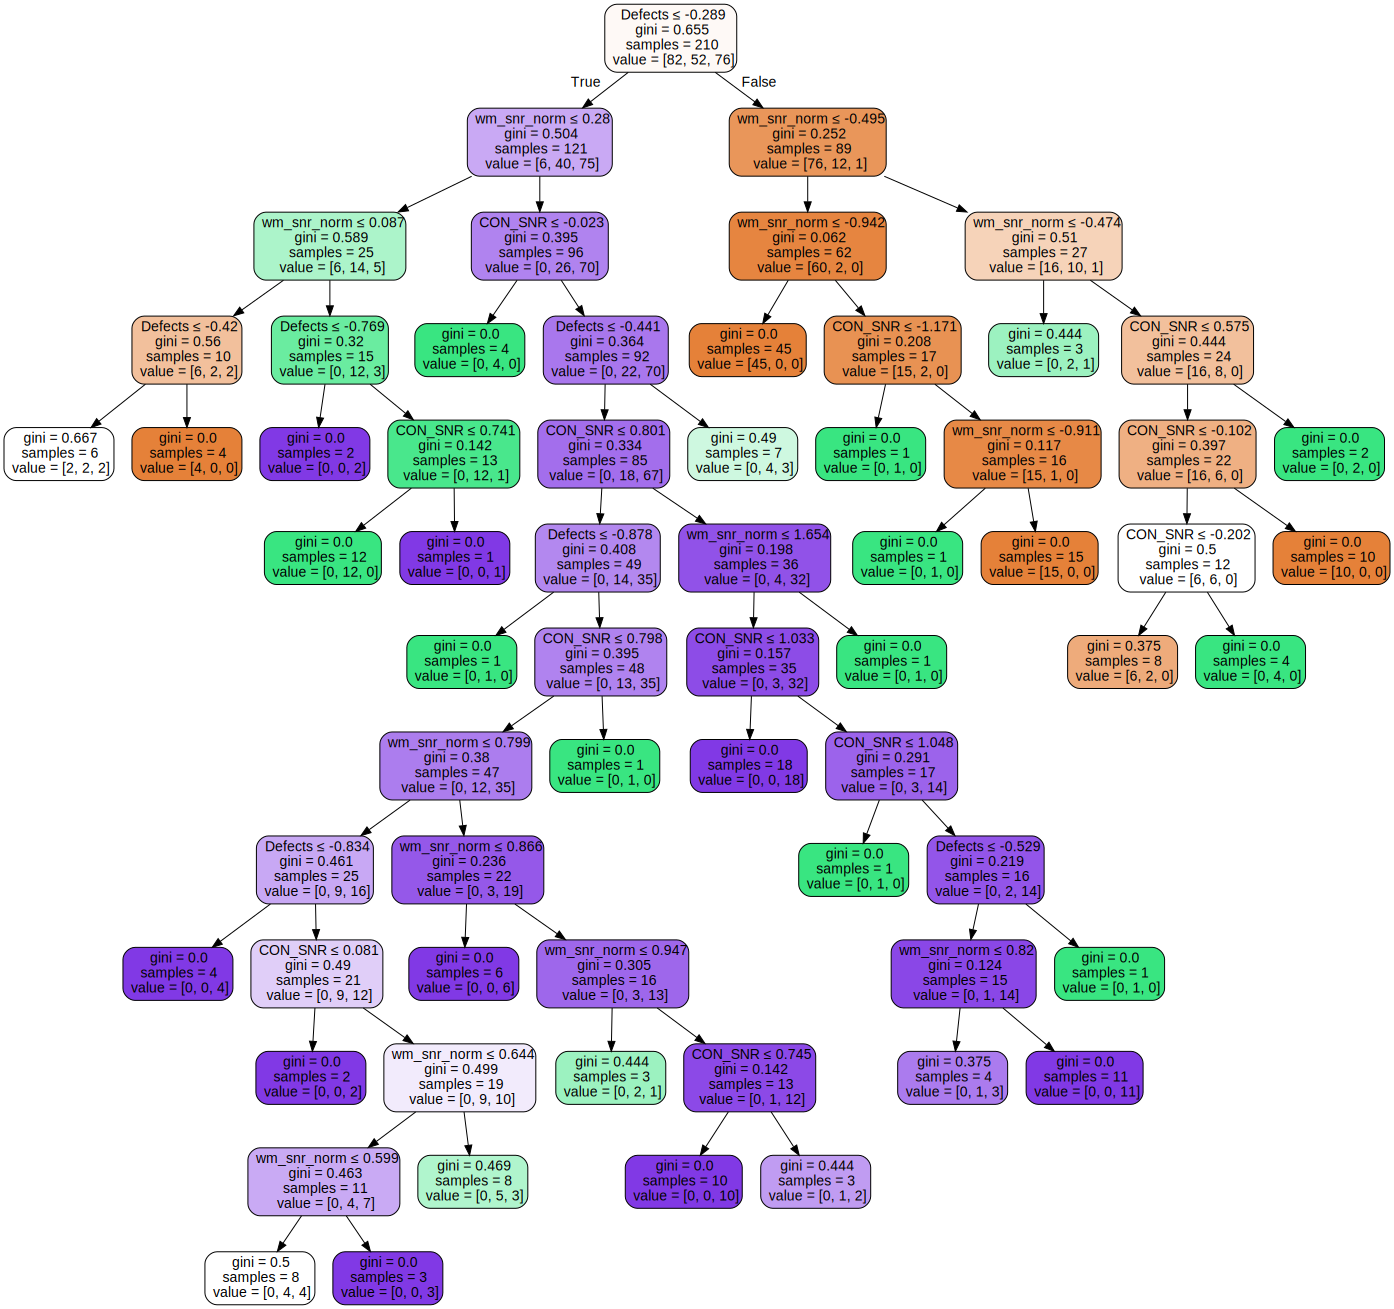

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(
    model,
    out_file=None,
    feature_names=df.columns[1:-1],
    filled=True,
    rounded=True,
    special_characters=True,
)

graph = graphviz.Source(dot_data)
graph